Calcule as coordenadas $\overline{x}$ e $\overline{y}$ do centroide da placa mostrada abaixo.

![alt text](centroid_Hibbeler9_124.png "Title")

In [1]:
%matplotlib inline
import click
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

In [2]:
# função limite superior
def ff1(xx):
    return np.sqrt(2.0 * xx)

# função limite inferior
def ff2(xx):
    return -1.0 * xx

In [7]:
# vetor x entre [0,2] para gerar os valores f(x) da função superior (200 pontos no intervalo)
xgen_sup = np.linspace(0.0, 2.0, 200, endpoint=True)

# vetor x entre [2,0] para gerar os valores f(x) da função inferior
xgen_inf = np.flipud(xgen_sup)

# lista das tuplas com coordenadas (x, f(x)) das funcões superior (coords1) e inferior (coords2)
coords1 = [(xx, yy) for xx, yy in zip(xgen_sup, ff1(xgen_sup))]
coords2 = [(xx, yy) for xx, yy in zip(xgen_inf, ff2(xgen_inf))]

# concatena as listas acima, fechando o contorno da área
coords = [*coords1, *coords2]

In [8]:
# cria um objeto polygon a partir da lista de coordenadas
polygon = Polygon(coords)

In [9]:
# obtém atributos - área, centroide e coordenadas do contorno - do objeto
aa = polygon.area
cc = polygon.centroid.coords.xy
xe, ye = polygon.exterior.coords.xy

# imprime área e coordenadas do centroide
click.secho(f'polygon area', color='black', bold=True)
click.secho(f'{aa:.4f}')
click.secho(f'centroid coords', color='black', bold=True)
click.secho(f'({cc[0][0]:.4f}, {cc[1][0]:.4f})')

polygon area
4.6664
centroid coords
(1.2572, 0.1429)


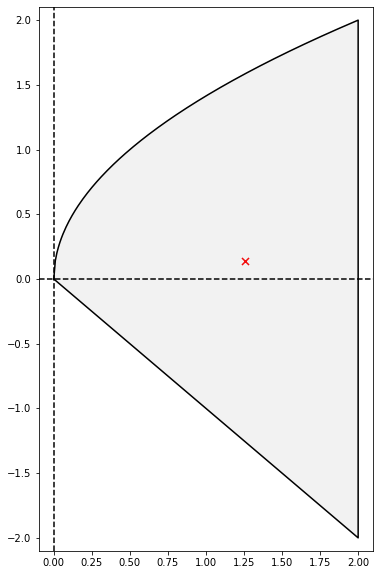

In [10]:
# plota polígono com a posição do centroide indicada
fig, ax = plt.subplots(figsize=(6,10))
patch = PolygonPatch(polygon, fc='gray', alpha=0.1, zorder=2)
ax.add_patch(patch)
ax.plot(xe, ye, color='black', linewidth=1.5, linestyle='-', marker='')
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')
ax.scatter(cc[0], cc[1], color='red', s=50, marker='x')
ax.set_xlim(-0.1, 2.1)
ax.set_ylim(-2.1, 2.1)
plt.show()

***
Como comparação, através de integração dupla, temos

$\displaystyle A = \int_{A} dA = \int_{0}^{x_f} \left(\int_{-x}^{\sqrt{2x}} dy\right) dx = \frac{\sqrt{8}}{3} x_f^{3/2} + \frac{1}{2}x_f^2$

Para $x_f = 2~\mathrm{m} \rightarrow A = 4.66667~\mathrm{m}^2$.

$\displaystyle Q_y = \int_{A} x\,dA = \int_{0}^{x_f} \left( \int_{-x}^{\sqrt{2x}} x\,dy \right) = \frac{2\sqrt{2}}{5}x_f^{5/2} + \frac{1}{3}x_f^3$

Para $x_f = 2~\mathrm{m} \rightarrow Q_y = 5.86667~\mathrm{m}^3$.

$\displaystyle Q_x = \int_{A} y\,dA = \int_{0}^{x_f} \left( \int_{-x}^{\sqrt{2x}} y\,dy \right) = \frac{1}{2}x_f^{2} - \frac{1}{6}x_f^3$

Para $x_f = 2~\mathrm{m} \rightarrow Q_x = 0.66667~\mathrm{m}^3$.

Portanto,

$\displaystyle \overline{x} = \frac{Q_y}{A} = 1.25714~\mathrm{m}$;

$\displaystyle \overline{y} = \frac{Q_x}{A} = 0.14286~\mathrm{m}$.